In [15]:
import pandas

* interested in understanding the relationship b/t the weather and the number of mosquitos occuring during a particular year
* relationship at a particular site and whether or not it is consistent across sites
* data in csv files
* contains: single location data, rows holds single year info, mosiquito numbers and avg temps and rainfall 

year,temperature,rainfall,mosquitos  
2001,80,157,150  
2002,85,252,2177  
2003,86,154,153  

### Learning objectives
* conduct variable assignment, looping, and conditionals in python
* use an external py library
* read tabular data from a file
* subset and perform analysis on data
* display simple graphs

to get data needed for this unit:

### if you used get clone yesterday to get sio-swc:
  
1. navigate to sio-swc/ 
   * cd Desktop/sio-swc
2. run: git pull at the command line

### if you downloaded the zip file:

1. navigate to the Desktop
2. run: git clone https://github.com/ucsdlib/sio-swc.git

In [16]:
cd /Users/jtdennis/Desktop/sio-swc/mosquitos

/Users/jtdennis/Desktop/sio-swc/mosquitos


In [17]:
pandas.read_csv('A1_mosquito_data.csv')

year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243
5  2006           75       283        237
6  2007           80       214        190
7  2008           85       197        181
8  2009           74       231        200
9  2010           74       207        184

* read_csv() function belongs to pandas library
* dot notation 


In [18]:
!head A1_mosquito_data.csv

year,temperature,rainfall,mosquitos
2001,80,157,150
2002,85,252,217
2003,86,154,153
2004,87,159,158
2005,74,292,243
2006,75,283,237
2007,80,214,190
2008,85,197,181
2009,74,231,200


In [19]:
data = pandas.read_csv('A1_mosquito_data.csv')

In [20]:
print(data)

   year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243
5  2006           75       283        237
6  2007           80       214        190
7  2008           85       197        181
8  2009           74       231        200
9  2010           74       207        184


In [21]:
data

year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243
5  2006           75       283        237
6  2007           80       214        190
7  2008           85       197        181
8  2009           74       231        200
9  2010           74       207        184

* Once we have the data we can start playing with it.
* first let's ask what type of thing it is

In [22]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


* started in a data structure of DataFrame
* there are other data structures (remember numpy arrays from last class)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 4 columns):
year           10 non-null int64
temperature    10 non-null int64
rainfall       10 non-null int64
mosquitos      10 non-null int64
dtypes: int64(4)
memory usage: 400.0 bytes



* Two rows from 0 to 9
* Four columns 
* we can select an individual column of data using it's name:

In [24]:
print(data['year'])

0    2001
1    2002
2    2003
3    2004
4    2005
5    2006
6    2007
7    2008
8    2009
9    2010
Name: year, dtype: int64


In [25]:
print(type(data['year']))

<class 'pandas.core.series.Series'>


* or we can select several columns of data at once

In [26]:
print(data[['rainfall', 'temperature']])

   rainfall  temperature
0       157           80
1       252           85
2       154           86
3       159           87
4       292           74
5       283           75
6       214           80
7       197           85
8       231           74
9       207           74


* we can subset rows using slices
* let's get first two rows

In [27]:
print(data[0:2])

   year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217


* remember python uses 0 based indexing
* starts at the first value and goes up to, but doesn't include the second value
* one thing we can't do with this syntax is directly as for data from a single row

In [28]:
data[1]

KeyError: 1

* this is b/c data[1] is unambiguous
* if we want a single row we can either take a slice that returns a single row

In [29]:
print(data[1:2])

   year  temperature  rainfall  mosquitos
1  2002           85       252        217


* or use the `.iloc` method, which stands for "integer location" since we are looking up the row based on its integer:

In [30]:
print(data.iloc[1])

year           2002
temperature      85
rainfall        252
mosquitos       217
Name: 1, dtype: int64


* we can also use this syntax to get larger subsets

In [31]:
print(data.iloc[1:3])

   year  temperature  rainfall  mosquitos
1  2002           85       252        217
2  2003           86       154        153


* we can also subset the data based on the value of other rows:

In [32]:
print(data['temperature'][data['year'] > 2005])

5    75
6    80
7    85
8    74
9    74
Name: temperature, dtype: int64


* data frames also know how to perform common math
* mean

In [33]:
print(data.mean())

year           2005.5
temperature      80.0
rainfall        214.6
mosquitos       191.3
dtype: float64


In [34]:
print(data.max())

year           2010
temperature      87
rainfall        292
mosquitos       243
dtype: int64


In [35]:
print(data['temperature'].min())

74


In [36]:
print(data['mosquitos'][1:3].std())

45.2548339959


In [37]:
print(data.describe())

             year  temperature    rainfall  mosquitos
count    10.00000    10.000000   10.000000   10.00000
mean   2005.50000    80.000000  214.600000  191.30000
std       3.02765     5.456902   50.317216   33.23335
min    2001.00000    74.000000  154.000000  150.00000
25%    2003.25000    74.250000  168.500000  163.75000
50%    2005.50000    80.000000  210.500000  187.00000
75%    2007.75000    85.000000  246.750000  212.75000
max    2010.00000    87.000000  292.000000  243.00000


## Challenge

Import the data from A2_mosquito_data.csv, create a new variable that holds a data frame with only the weather data, and print the means and standard deviations for the weather variables.

In [38]:
data2 = pandas.read_csv('A2_mosquito_data.csv')
data2.head()

year  temperature  rainfall  mosquitos
0  1960           82       200        180
1  1961           70       227        194
2  1962           89       231        207
3  1963           74       114        121
4  1964           78       147        140

In [39]:
weather = data2[["temperature","rainfall"]]
print(data2.temperature.mean(), data2.temperature.std(), data2.rainfall.mean(), data2.rainfall.std())

80.3921568627 6.13540033371 207.039215686 56.5603963156


## Loops

* we can loop over the data and perform operations
* remember loop structure:

```python
for item in list:
   do_something
```

* let's look over temperatures and print out their values in degrees Celsius

In [40]:
temps = data['temperature']
for temp_in_f in temps:
    temp_in_c = (temp_in_f - 32) * 5/9
    print(temp_in_c)

26.6666666667
29.4444444444
30.0
30.5555555556
23.3333333333
23.8888888889
26.6666666667
29.4444444444
23.3333333333
23.3333333333


## Conditionals 

* let's review conditionals from yester (if/then/else)

```python
if condition: 
   do_something
```

* So if we want to loop over the temperatures and print out only those temperatures that are > 80

In [41]:
data.head()

year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243

In [42]:
data['temperature'][0]

80

In [43]:
temp = data['temperature'][0]
temp

80

In [44]:
temp = data['temperature'][0]
if temp > 75:
    print("The temperature is greater than 75")

The temperature is greater than 75


* We can also use `==` for equality
* `<=` for less than or equal to
* `>=` for greater than or equal to
* `!=` for not equal to

* we can add conditions with elif and else

In [45]:
temp = data['temperature'][0]
if temp < 80:
    print("the temp is < 80")
elif temp > 80:
    print("the temp is > 80")
else:
    print("the temp is equal to 80")

the temp is equal to 80


### Challenge:
>**Import the data from A2_mosquito_data.csv, determine the mean temperate, and loop over the temperature values. For each value print out whether it is greater than the mean, less than the mean, or equal to the mean.**

In [46]:
print(data2['temperature'].head())
print("Mean", data2.temperature.mean())

0    82
1    70
2    89
3    74
4    78
Name: temperature, dtype: int64
Mean 80.3921568627


In [47]:
for temp in data2["temperature"]:
    if temp > data2.temperature.mean():
        print(temp, "is greater than", data2.temperature.mean())
    else:
        print(temp, "is less than", data2.temperature.mean())

82 is greater than 80.3921568627
70 is less than 80.3921568627
89 is greater than 80.3921568627
74 is less than 80.3921568627
78 is less than 80.3921568627
85 is greater than 80.3921568627
86 is greater than 80.3921568627
75 is less than 80.3921568627
70 is less than 80.3921568627
86 is greater than 80.3921568627
83 is greater than 80.3921568627
78 is less than 80.3921568627
87 is greater than 80.3921568627
76 is less than 80.3921568627
86 is greater than 80.3921568627
90 is greater than 80.3921568627
76 is less than 80.3921568627
87 is greater than 80.3921568627
88 is greater than 80.3921568627
87 is greater than 80.3921568627
81 is greater than 80.3921568627
74 is less than 80.3921568627
85 is greater than 80.3921568627
71 is less than 80.3921568627
80 is less than 80.3921568627
72 is less than 80.3921568627
76 is less than 80.3921568627
85 is greater than 80.3921568627
83 is greater than 80.3921568627
86 is greater than 80.3921568627
82 is greater than 80.3921568627
77 is less than 

### Plotting

In [48]:
%matplotlib inline

In [49]:
from matplotlib import pyplot as plt

* couple new things in the import statement above
    1. we can import part of a library using `from library import submodule` syntax
    2. we can use a different name to refer to the by using `as new name` - this called aliasing
* let's make a simple plot showing how the number of mosquitos varies over time

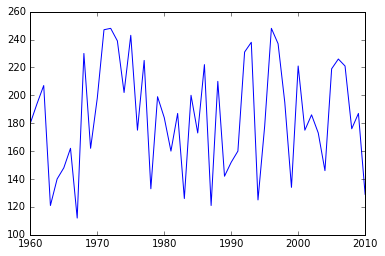

In [50]:
data = pandas.read_csv('A2_mosquito_data.csv')
plt.plot(data['year'], data['mosquitos'])

* more complicated plots can be created by adding more info
* let's look at how the diff. weather variables vary over time

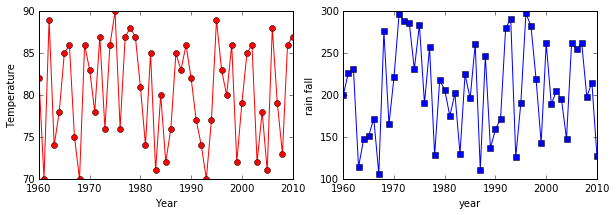

In [51]:
plt.figure(figsize=(10.0,3.0))

plt.subplot(1,2,1)
plt.plot(data['year'], data['temperature'], 'ro-')
plt.xlabel('Year')
plt.ylabel('Temperature')

plt.subplot(1,2,2)
plt.plot(data['year'], data['rainfall'], 'bs-')
plt.xlabel('year')
plt.ylabel('rain fall')

### Challenge

>**Using the data in A2_mosquito_data.csv plot the relationship between the number of mosquitos and temperature and the number of mosquitos and rainfall. To change to a scatter plot in matplotlib use plt.scatter() instead of plt.plot(). Don't inlcude the color and shape parameter ('ro-' and 'bs-')**

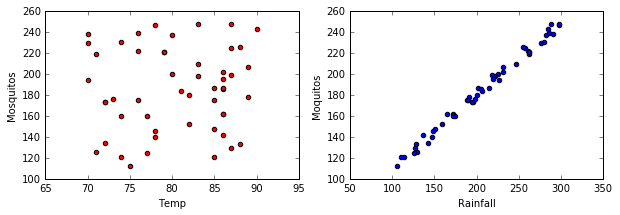

In [52]:
plt.figure(figsize=(10.0,3.0))

plt.subplot(1,2,1)
plt.scatter(data['temperature'], data2['mosquitos'], c="red")
plt.xlabel('Temp')
plt.ylabel('Mosquitos')

plt.subplot(1,2,2)
plt.scatter(data['rainfall'], data['mosquitos'])
plt.xlabel('Rainfall')
plt.ylabel('Moquitos')

## Modularization and Doc

* relationship b/t the weather and the number of mosquitos so that we can control mosiquitos
* relationships across sites

** learning objectives**

* write code for ppl, not computers
* break programs into chunks 
* write functions
* document code

In [53]:
import pandas as pd

In [54]:
data = pd.read_csv('A2_mosquito_data.csv')

In [55]:
print(data)

    year  temperature  rainfall  mosquitos
0   1960           82       200        180
1   1961           70       227        194
2   1962           89       231        207
3   1963           74       114        121
4   1964           78       147        140
5   1965           85       151        148
6   1966           86       172        162
7   1967           75       106        112
8   1968           70       276        230
9   1969           86       165        162
10  1970           83       222        198
11  1971           78       297        247
12  1972           87       288        248
13  1973           76       286        239
14  1974           86       231        202
15  1975           90       284        243
16  1976           76       190        175
17  1977           87       257        225
18  1978           88       128        133
19  1979           87       218        199
20  1980           81       206        184
21  1981           74       175        160
22  1982   

* write code for people not computers
* use meaniful variable names

In [56]:
import pandas as pd

data = pd.read_csv('A2_mosquito_data.csv')
print(data.head())

   year  temperature  rainfall  mosquitos
0  1960           82       200        180
1  1961           70       227        194
2  1962           89       231        207
3  1963           74       114        121
4  1964           78       147        140


* let's go ahead and conduct a regression on the data
* we will use `statsmodels` library to conduct the regression

## More pandas 

* Let's exlore using pandas some more
* We can get attributes of the data frame, like it's columns

In [57]:
data = pandas.read_csv("A1_mosquito_data.csv", sep=",")

In [58]:
data.columns

Index(['year', 'temperature', 'rainfall', 'mosquitos'], dtype='object')

In [59]:
%matplotlib inline

* we can plot a single variable using the dot notation to plot from a dataframe objtect

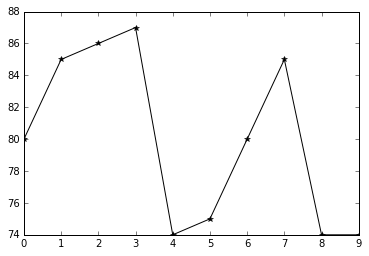

In [60]:
data['temperature'].plot(color="black", marker="*")

* we can also set the index of the data frame

In [61]:
data.head()

year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243

* pandas has a concept of row index that you can set to what you want
* in this case, let's set our row index to `year`
* by default it will read in as the integer index

In [62]:
data.set_index('year')

temperature  rainfall  mosquitos
year                                  
2001           80       157        150
2002           85       252        217
2003           86       154        153
2004           87       159        158
2005           74       292        243
2006           75       283        237
2007           80       214        190
2008           85       197        181
2009           74       231        200
2010           74       207        184

In [63]:
data

year  temperature  rainfall  mosquitos
0  2001           80       157        150
1  2002           85       252        217
2  2003           86       154        153
3  2004           87       159        158
4  2005           74       292        243
5  2006           75       283        237
6  2007           80       214        190
7  2008           85       197        181
8  2009           74       231        200
9  2010           74       207        184

* we can save that setting by overwriting our data

In [64]:
data = data.set_index('year')

In [65]:
data.head()

temperature  rainfall  mosquitos
year                                  
2001           80       157        150
2002           85       252        217
2003           86       154        153
2004           87       159        158
2005           74       292        243

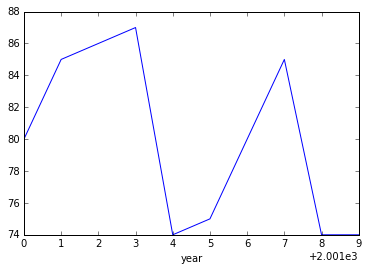

In [66]:
data['temperature'].plot()

* ah what happened to the x axes labels?  
* our index is not the right data type

In [67]:
data.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype='int64', name='year')

* lets fix and rerun the plot making our index into a string

In [68]:
data.index = data.index.map(str)

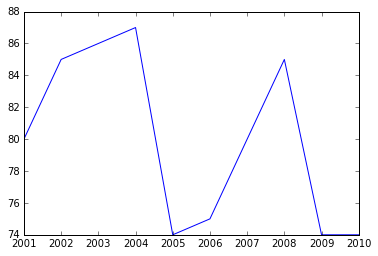

In [69]:
data['temperature'].plot()

* one attribute of data frames is `dtypes` - tells us what our data types are

In [70]:
data.dtypes

temperature    int64
rainfall       int64
mosquitos      int64
dtype: object

## subsetting and filtering
* Subsetting and filtering data frames
* let's see only temp greater than 80

In [71]:
data[data["temperature"] > 80]

temperature  rainfall  mosquitos
2002           85       252        217
2003           86       154        153
2004           87       159        158
2008           85       197        181

In [72]:
data[data["temperature"] > 80]["rainfall"]

2002    252
2003    154
2004    159
2008    197
Name: rainfall, dtype: int64

In [73]:
type(data)

pandas.core.frame.DataFrame

* let's grab mosiquitos where rainfall is less than 200

### Challenge

>Select the mosiquitos where rainfall is less than 200

In [74]:
data[data['rainfall'] < 200]['mosquitos']

2001    150
2003    153
2004    158
2008    181
Name: mosquitos, dtype: int64

* this is equivalent statement:

In [75]:
data['mosquitos'][data['rainfall'] < 200]

2001    150
2003    153
2004    158
2008    181
Name: mosquitos, dtype: int64

* we can also get the max of that returned object

In [76]:
data[data['rainfall'] < 200]['mosquitos'].max()

181

**NOTE** - we can walk through this step by step

* we can also assign it to a variable for later

In [77]:
mosquitos_with_low_rainfall = data['mosquitos'][data['rainfall'] < 200]

In [78]:
type(mosquitos_with_low_rainfall)

pandas.core.series.Series

In [79]:
mosquitos_with_low_rainfall

2001    150
2003    153
2004    158
2008    181
Name: mosquitos, dtype: int64

In [80]:
mosquitos_with_low_rainfall.index

Index(['2001', '2003', '2004', '2008'], dtype='object')

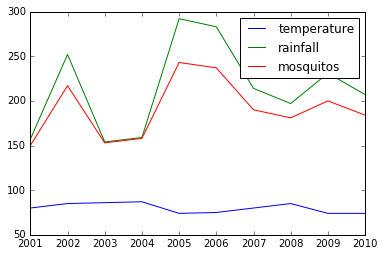

In [81]:
data.plot()

### Functions

* review: 

```python
def function_name(inputs):
    do stuff
    return output
```

* general form

**EXAMPLE: function that returns the value of a number squared**

In [82]:
def square(x):
    x_squared = x ** 2
    return x_squared

print('Four sqared is', square(4))
print('Five squared is', square(5))

Four sqared is 16
Five squared is 25


In [83]:
#we can also return the desired value directly
def square(x):
    return x ** 2

print(square(3))

9


* remember if we want to use the results of a function later we need to store it

In [84]:
two_squared = square(2)
print(two_squared)

4


## Challenge 

>“Adding” two strings produces their concatenation: 'a' + 'b' is 'ab'. Write a function called fence that takes two parameters called original and wrapper and returns a new string that has the wrapper character at the beginning and end of the original. A call to your function should look like this:

>print(fence('name', '*'))

>\*name\*


In [85]:
def fence(original, wrapper):
    return wrapper + original + wrapper
fence("hello", "**")

'**hello**'

## Challenge
>If the variable s refers to a string, then s[0] is the string’s first character and s[-1] is its last. Write a function called outer that returns a string made up of just the first and last characters of its input. A call to your function should look like this:

>print(outer('helium'))  
>hm

In [86]:
def outer(input_string):
    return input_string[0] + input_string[-1]

print(outer('helium'))

hm


What does the following piece of code display when run - and why?

```python
f = 0
k = 0

def f2k(f):
  k = ((f-32)*(5.0/9.0)) + 273.15
  return k

f2k(8)
f2k(41)
f2k(32)

print(k)
```


In [87]:
f = 0
k = 0

def f2k(f):
  k = ((f-32)*(5.0/9.0)) + 273.15
  return k

print(f2k(8))
print(f2k(41))
print(f2k(32))

print(k)
#k is 0 because the k inside the function f2k doesn’t 
#know about the k defined outside the function.


259.81666666666666
278.15
273.15
0


* Each time a function is called, a new stack frame is created on the **call stack** to hold its parameters and local variables.

## Challenge - function 

1. Write a function called fahr_to_celsius that converts temperature from Fahrenheit to Celcius and use it to replace

>```python
>data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
>```
>
> in our program.

In [88]:
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr- 32) * 5/9
    return temp_celsius

print(fahr_to_celsius(32))

0.0


*Walk through someone’s result. When discussing talk about different names. E.g., fahr_to_celcius is better than temp_to_celcius since it is explicit both the input and the output. Talk about the fact that even though this doesn’t save us any lines of code it’s still easier to read.*

## Functions

Documenting our functions. Using function with pandas objects.

In [89]:
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr- 32) * 5/9
    return temp_celsius

In [90]:
fahr_to_celsius(32)

0.0

In [91]:
fahr_to_celsius(212)

100.0

* 
* let's comment our function

In [92]:
#this is a comment
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr- 32) * 5/9
    return temp_celsius

In [93]:
"this is a string"

'this is a string'

In [94]:
#doesn't work
"a multiline 
string
"

SyntaxError: EOL while scanning string literal (<ipython-input-94-316711d988ad>, line 2)

* a triple quote (single or double) will let us do a multi lined string

In [95]:
multiline_string = ''' line one
line 2
one more
'''

In [96]:
print(multiline_string)

 line one
line 2
one more



In [97]:
#when we see the literal string we see the new line character
multiline_string

' line one\nline 2\none more\n'

In [98]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsiuss
    
    Return Celsius conversion of input
    """
    temp_celsius = (temp_fahr- 32) * 5/9
    return temp_celsius

In [99]:
# use a question after the function to get python help
fahr_to_celsius?

## Challenge - documenting

Revise a function you wrote for one of the previous exercises to try to make the code more readable. Then, collaborate with one of your neighbors to critique each other’s functions and discuss how your function implementations could be further improved to make them more readable.


In [100]:
def fence(original, wrapper):
    return wrapper + original + wrapper
fence("hello", "**")

'**hello**'

In [101]:
def fence(original, wrapper):
    """Returns a string with a wrapper
    Args: 
        param1 (str): String we want wrapped
        param2 (str): The wrapper for param1
        
    Example:
    >>> fence("hello", "++")
    ++hello++
    """
    return wrapper + original + wrapper

In [102]:
fence?

In [103]:
data.head()

temperature  rainfall  mosquitos
2001           80       157        150
2002           85       252        217
2003           86       154        153
2004           87       159        158
2005           74       292        243

* now we have the have the function we can apply it to our data frame
* let's see how that looks and then save to the data frame itself 

In [104]:
fahr_to_celsius(data['temperature'])

2001    26.666667
2002    29.444444
2003    30.000000
2004    30.555556
2005    23.333333
2006    23.888889
2007    26.666667
2008    29.444444
2009    23.333333
2010    23.333333
Name: temperature, dtype: float64

In [105]:
data["temperature_c"] = fahr_to_celsius(data['temperature'])

In [106]:
data.head()

temperature  rainfall  mosquitos  temperature_c
2001           80       157        150      26.666667
2002           85       252        217      29.444444
2003           86       154        153      30.000000
2004           87       159        158      30.555556
2005           74       292        243      23.333333

* yay we added a new column on our dataframe
* let's plot using that var and save our plot to the disk

In [107]:
%matplotlib inline

In [108]:
import matplotlib.pyplot as plt

In [109]:
plt.plot?

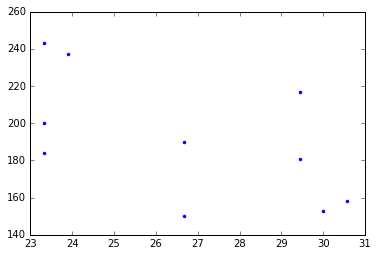

In [110]:
plt.plot(data['temperature_c'], data['mosquitos'], ".")
plt.savefig('A1_mosquito_data_mosquitos_vs_tempC.png')

In [111]:
!ls *png

A1_mosquito_data_mosquitos_vs_tempC.png A3_mosquito_data_mosquitos_vs_tempC.png
A2_mosquito_data_mosquitos_vs_tempC.png B1_mosquito_data_mosquitos_vs_tempC.png


* ok, we've successfully added a column to our data frame and plotted values
* then we saved that image to the file system
* but remember: we have a number of files in that directory

In [112]:
!ls -l *csv

-rw-r--r--  1 jtdennis  2113415076  196 Feb  6  2016 A1_mosquito_data.csv
-rw-r--r--  1 jtdennis  2113415076  852 Feb  6  2016 A2_mosquito_data.csv
-rw-r--r--  1 jtdennis  2113415076  827 Feb  6  2016 A3_mosquito_data.csv
-rw-r--r--  1 jtdennis  2113415076  823 Feb  6  2016 B1_mosquito_data.csv
-rw-r--r--  1 jtdennis  2113415076  852 Feb  6  2016 B2_mosquito_data.csv
-rw-r--r--  1 jtdennis  2113415076  217 Sep 20 14:11 a4.csv


* what we want is to be able to read each of those files, plot and save the fig out
* problem is we don't want to have to specify the file name manually
* let's see if we can manipulate our csv filenames 

In [113]:
a = "A1_mosquitos_data.csv"

In [114]:
a

'A1_mosquitos_data.csv'

* remember how we sliced off parts of strings last week
* we can reuse that here

In [115]:
a[0:-3] + "png"

'A1_mosquitos_data.png'

* we can also concatenate our last part -- that tells us what we plotted

In [116]:
a[0:-4] + "_mosquitos_vs_tempC.png"

'A1_mosquitos_data_mosquitos_vs_tempC.png'

* we can do string replacement using the replace method

In [117]:
a.replace(".csv", ".png")

'A1_mosquitos_data.png'

**Let's put it all together with our conversion and plotting above into a couple of functions**

In [118]:
def fahr_to_celsius(temp_fahr):
    temp_celsius = (temp_fahr- 32) * 5/9
    return temp_celsius

In [119]:
%matplotlib inline

* It is often good to write out what you want the function to do step by step

In [120]:
def create_mosquitos_vs_tempC_plot(filename):
    # write out process here
    #load data
    #conert celsius
    #create the plot
    #save the plot
    pass
    

* Then just write out those operations 

In [121]:
def create_mosquitos_vs_tempC_plot(filename):
  # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print("Saving", filename_png)
    return filename_png

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


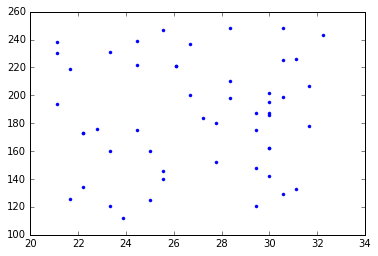

In [122]:
name_of_png = create_mosquitos_vs_tempC_plot('A2_mosquito_data.csv')

* yay, we sucessfully created a function that takes a filename, reads in data, does a conversion, plots and then saves plot to the file

In [123]:
print(name_of_png)

A2_mosquito_data_mosquitos_vs_tempC.png


Loading B1_mosquito_data.csv
Plotting B1_mosquito_data.csv
Saving B1_mosquito_data_mosquitos_vs_tempC.png


'B1_mosquito_data_mosquitos_vs_tempC.png'

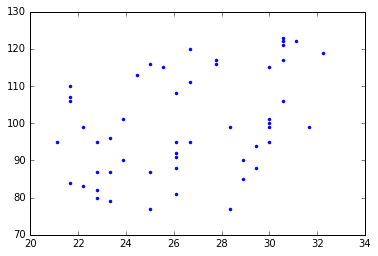

In [124]:
create_mosquitos_vs_tempC_plot("B1_mosquito_data.csv")

In [125]:
!ls *png

A1_mosquito_data_mosquitos_vs_tempC.png A3_mosquito_data_mosquitos_vs_tempC.png
A2_mosquito_data_mosquitos_vs_tempC.png B1_mosquito_data_mosquitos_vs_tempC.png


* **now, how about instead of returning the new plot filename, let's return the data frame**
* we just need to change the return value

In [126]:
def create_mosquitos_vs_tempC_plot(filename):
  # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print("Saving", filename_png)
    return mosquitos_data

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


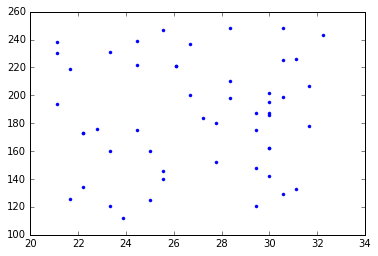

In [127]:
mosquito_data_A2 = create_mosquitos_vs_tempC_plot("A2_mosquito_data.csv")

* we can then save that new data out as csv

In [128]:
mosquito_data_A2.to_csv("A2_mosquito_data_C.csv")

In [129]:
mosquito_data_A2.head()

year  temperature  rainfall  mosquitos  temperature_C
0  1960           82       200        180      27.777778
1  1961           70       227        194      21.111111
2  1962           89       231        207      31.666667
3  1963           74       114        121      23.333333
4  1964           78       147        140      25.555556

In [130]:
!head A2_mosquito_data_C.csv

,year,temperature,rainfall,mosquitos,temperature_C
0,1960,82,200,180,27.77777777777778
1,1961,70,227,194,21.11111111111111
2,1962,89,231,207,31.666666666666668
3,1963,74,114,121,23.333333333333332
4,1964,78,147,140,25.555555555555557
5,1965,85,151,148,29.444444444444443
6,1966,86,172,162,30.0
7,1967,75,106,112,23.88888888888889
8,1968,70,276,230,21.11111111111111


### Making a module

* Let's write a script! 
* We will turn our functions into a script and use in panadas like our `import` modules
* open a text editor, nano cd to the mosquitos dir! 
* `cd ~/Desktop/sio-swc/mosquitos/`
* nano `analyze.py`


In [131]:
!ls *py

analyze.py            run_analyze_script.py


In [132]:
cd ~/workshops/lecture-notes/intermed-py/

/Users/jtdennis/workshops/lecture-notes/intermed-py


In [133]:
!cat analyze.py

import pandas
import matplotlib.pyplot as plt

def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsiuss
    
    Return Celsius conversion of input
    """
    temp_celsius = (temp_fahr- 32) * 5/9
    return temp_celsius

def create_mosquitos_vs_tempC_plot(filename):
    """Create a png plot of mosquitos vs temp C
    
    Parameters
    ----------
    filename : string
        name of csv data file
    Returns
    -------
    mosquito_data : DataFrame
        Table with temp C column
    """
    
    # write processing here
    # load data
    print("Loading", filename)
    mosquitos_data = pandas.read_csv(filename)
    # convert celsius
    mosquitos_data["temperature_C"] = fahr_to_celsius(mosquitos_data["temperature"])
    # create the plot
    print("Plotting", filename)
    plt.plot(mosquitos_data["temperature_C"], mosquitos_data["mosquitos"], ".")
    # save the plot
    filename_png = filename[0:-4] + "_mosquitos_vs_tempC.png"
    plt.savefig(filename_png)
    print

In [134]:
%matplotlib inline

In [135]:
import analyze

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


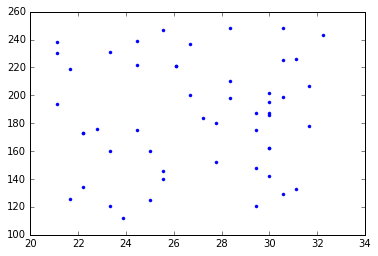

In [136]:
data = analyze.create_mosquitos_vs_tempC_plot("A2_mosquito_data.csv")

In [137]:
print(data)

    year  temperature  rainfall  mosquitos  temperature_C
0   1960           82       200        180      27.777778
1   1961           70       227        194      21.111111
2   1962           89       231        207      31.666667
3   1963           74       114        121      23.333333
4   1964           78       147        140      25.555556
5   1965           85       151        148      29.444444
6   1966           86       172        162      30.000000
7   1967           75       106        112      23.888889
8   1968           70       276        230      21.111111
9   1969           86       165        162      30.000000
10  1970           83       222        198      28.333333
11  1971           78       297        247      25.555556
12  1972           87       288        248      30.555556
13  1973           76       286        239      24.444444
14  1974           86       231        202      30.000000
15  1975           90       284        243      32.222222
16  1976      

* notice that we added out earlier version of the plotting function to the file -- the one that returned the file
* edit the file and return mosquitos_data instead
* let's rerun the function call

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


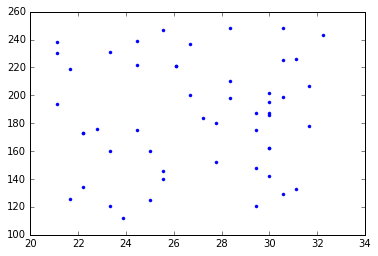

In [138]:
data = analyze.create_mosquitos_vs_tempC_plot("A2_mosquito_data.csv")

In [139]:
print(data)

    year  temperature  rainfall  mosquitos  temperature_C
0   1960           82       200        180      27.777778
1   1961           70       227        194      21.111111
2   1962           89       231        207      31.666667
3   1963           74       114        121      23.333333
4   1964           78       147        140      25.555556
5   1965           85       151        148      29.444444
6   1966           86       172        162      30.000000
7   1967           75       106        112      23.888889
8   1968           70       276        230      21.111111
9   1969           86       165        162      30.000000
10  1970           83       222        198      28.333333
11  1971           78       297        247      25.555556
12  1972           87       288        248      30.555556
13  1973           76       286        239      24.444444
14  1974           86       231        202      30.000000
15  1975           90       284        243      32.222222
16  1976      

* doesn't work! 
* in juypter we have to explicitly 'reload' the module and this requies importing it from the importlib
* there's also `autoreload` extension 


In [140]:
#only use if using jupyter text editor
from importlib import reload
reload(analyze)

<module 'analyze' from '/Users/jtdennis/workshops/lecture-notes/intermed-py/analyze.py'>

Loading A2_mosquito_data.csv
Plotting A2_mosquito_data.csv
Saving A2_mosquito_data_mosquitos_vs_tempC.png


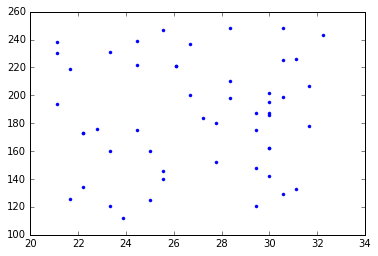

In [141]:
data = analyze.create_mosquitos_vs_tempC_plot("A2_mosquito_data.csv")

In [142]:
data.head()

year  temperature  rainfall  mosquitos  temperature_C
0  1960           82       200        180      27.777778
1  1961           70       227        194      21.111111
2  1962           89       231        207      31.666667
3  1963           74       114        121      23.333333
4  1964           78       147        140      25.555556

In [143]:
!ls *.png

A1_mosquito_data_mosquitos_vs_tempC.png A2_mosquito_data_mosquitos_vs_tempC.png B1_mosquito_data_mosquitos_vs_tempC.png


**Last step -create a Python script that let's us run the above script from the command line**

1. Open another ext file
2. Call it run_analyze_script
3. Add the below to the file (using the cat command to print the file to the notebook)

In [144]:
!cat run_analyze_script.py

import analyze
import sys 

#filename = "a2_mosquito_data.csv"
#argv[0] our script filename
filename = sys.argv[1]

analyze2.create_mosquitos_vs_tempC_plot(filename)


A note about the above: 

`sys.argv[1]` is the second element of the command line arguements - in this case the script filename is the first. So:
>python scriptname.py filename.csv 

sys.argv[0] is scriptname.py  
sys.argv[1] is filename.csv 

1. Lastly open a terminal console (cmd in win)
2. Go to the same directory of the file 
3. Type: `python run_analyze_script.py B1_mosquito_data.csv` in the command line and enter

* Yay! good job. 